## Notebook for the finding of sex-covariates
### Developed by: Anna Maguza

### Institute of Computational Biology - Computational Health Centre - Hemlholtz Munich

### 12 October 2022

This notebook was developed separately because pybiomart package that is needed to this analysis is incompetible with some packages in my main environment, therefore, I have created a new environment

#### Load required packages

In [1]:
import numpy as np
import pandas as pd
import pybiomart as bm
import scanpy as sc

#### Setup Cells

In [2]:
%matplotlib inline

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.1 numpy==1.23.3 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.1.2 statsmodels==0.13.2 pynndescent==0.5.7


## Khaliq-2022

#### Uploading data

In [4]:
#Khaliq-2022
input_CRC_file = '/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Anna-Master-Project/khaliq_2022_anndata_raw.h5ad'  # the file that will store the analysis results
output_CRC_file = '/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Anna-Master-Project/khaliq_2022_anndata_processed.h5ad'  # the file that will store the analysis results

In [5]:
#Anndata upload
khaliq_ad = sc.read_h5ad(input_CRC_file)
khaliq_ad.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
#Delete normal samples (leave only tumor)
khaliq_ad_tumor = khaliq_ad[khaliq_ad.obs.Condition == "Tumor", :]

In [4]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [8]:
annot.head()

ensembl_gene_id  start_position  end_position  \
external_gene_name                                                  
MT-TF               ENSG00000210049             577           647   
MT-RNR1             ENSG00000211459             648          1601   
MT-TV               ENSG00000210077            1602          1670   
MT-RNR2             ENSG00000210082            1671          3229   
MT-TL1              ENSG00000209082            3230          3304   

                   chromosome_name  
external_gene_name                  
MT-TF                           MT  
MT-RNR1                         MT  
MT-TV                           MT  
MT-RNR2                         MT  
MT-TL1                          MT

In [9]:
chrY_genes = khaliq_ad_tumor.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['RPS4Y1', 'ZFY', 'ZFY-AS1', 'LINC00278', 'TBL1Y', 'USP9Y', 'DDX3Y',
       'UTY', 'TMSB4Y', 'NLGN4Y', 'FAM224B', 'TTTY14', 'KDM5D', 'TTTY10',
       'EIF1AY', 'RPS4Y2', 'PRORY', 'DAZ1'],
      dtype='object')

In [10]:
khaliq_ad_tumor.obs

samples Condition Location MSI_Status bulk_prediction  \
T_cac1_AAACCTGAGAATAGGG  T_cac1     Tumor    Right        MSS            CMS4   
T_cac1_AAACCTGAGCAGCGTA  T_cac1     Tumor    Right        MSS            CMS4   
T_cac1_AAACCTGCAATCTGCA  T_cac1     Tumor    Right        MSS            CMS4   
T_cac1_AAACCTGGTCTTGCGG  T_cac1     Tumor    Right        MSS            CMS4   
T_cac1_AAACCTGGTGTGCCTG  T_cac1     Tumor    Right        MSS            CMS4   
...                         ...       ...      ...        ...             ...   
T_cac9_TTTGGTTCAACACGCC  T_cac9     Tumor     Left        MSS            CMS2   
T_cac9_TTTGGTTCATAGACTC  T_cac9     Tumor     Left        MSS            CMS2   
T_cac9_TTTGGTTCATCTATGG  T_cac9     Tumor     Left        MSS            CMS2   
T_cac9_TTTGGTTTCAATCTCT  T_cac9     Tumor     Left        MSS            CMS2   
T_cac9_TTTGTCAGTCCAACTA  T_cac9     Tumor     Left        MSS            CMS2   

                        prediction  
T_cac1_AAACCTGAGAATAGGG       CMS2  
T_cac1_AAACCTGAGCAGCGTA       CMS4  
T_cac1_AAACCTGCAATCTGCA       CMS3  
T_cac1_AAACCTGGTCTTGCGG       CMS3  
T_cac1_AAACCTGGTGTGCCTG       CMS3  
...                            ...  
T_cac9_TTTGGTTCAACACGCC       CMS4  
T_cac9_TTTGGTTCATAGACTC       CMS4  
T_cac9_TTTGGTTCATCTATGG       CMS1  
T_cac9_TTTGGTTTCAATCTCT       CMS1  
T_cac9_TTTGTCAGTCCAACTA       CMS1  

[31586 rows x 6 columns]

In [12]:
khaliq_ad_tumor.var_names.str.match('XIST')

array([False, False, False, ..., False, False, False])

In [ ]:
khaliq_ad_tumor.X[:, khaliq_ad_tumor.var_names.str.match('XIST')].reshape(-1).tolist()

In [24]:
khaliq_ad_tumor.obs["XIST-counts"] = khaliq_ad_tumor.X[:,khaliq_ad_tumor.var_names.str.match('XIST')].reshape(-1).tolist()

In [25]:
khaliq_ad_tumor.obs

samples Condition Location MSI_Status bulk_prediction  \
T_cac1_AAACCTGAGAATAGGG  T_cac1     Tumor    Right        MSS            CMS4   
T_cac1_AAACCTGAGCAGCGTA  T_cac1     Tumor    Right        MSS            CMS4   
T_cac1_AAACCTGCAATCTGCA  T_cac1     Tumor    Right        MSS            CMS4   
T_cac1_AAACCTGGTCTTGCGG  T_cac1     Tumor    Right        MSS            CMS4   
T_cac1_AAACCTGGTGTGCCTG  T_cac1     Tumor    Right        MSS            CMS4   
...                         ...       ...      ...        ...             ...   
T_cac9_TTTGGTTCAACACGCC  T_cac9     Tumor     Left        MSS            CMS2   
T_cac9_TTTGGTTCATAGACTC  T_cac9     Tumor     Left        MSS            CMS2   
T_cac9_TTTGGTTCATCTATGG  T_cac9     Tumor     Left        MSS            CMS2   
T_cac9_TTTGGTTTCAATCTCT  T_cac9     Tumor     Left        MSS            CMS2   
T_cac9_TTTGTCAGTCCAACTA  T_cac9     Tumor     Left        MSS            CMS2   

                        prediction  XIST-counts  
T_cac1_AAACCTGAGAATAGGG       CMS2          0.0  
T_cac1_AAACCTGAGCAGCGTA       CMS4          0.0  
T_cac1_AAACCTGCAATCTGCA       CMS3          0.0  
T_cac1_AAACCTGGTCTTGCGG       CMS3          0.0  
T_cac1_AAACCTGGTGTGCCTG       CMS3          0.0  
...                            ...          ...  
T_cac9_TTTGGTTCAACACGCC       CMS4          0.0  
T_cac9_TTTGGTTCATAGACTC       CMS4          0.0  
T_cac9_TTTGGTTCATCTATGG       CMS1          0.0  
T_cac9_TTTGGTTTCAATCTCT       CMS1          0.0  
T_cac9_TTTGTCAGTCCAACTA       CMS1          0.0  

[31586 rows x 7 columns]

In [35]:
khaliq_ad_tumor.obs['percent_chrY'] = (np.sum(khaliq_ad_tumor[:, chrY_genes].X, axis = 1)/np.sum(khaliq_ad_tumor.X, axis = 1)*100).tolist()

In [36]:
khaliq_ad_tumor.obs

samples Condition Location MSI_Status bulk_prediction  \
T_cac1_AAACCTGAGAATAGGG  T_cac1     Tumor    Right        MSS            CMS4   
T_cac1_AAACCTGAGCAGCGTA  T_cac1     Tumor    Right        MSS            CMS4   
T_cac1_AAACCTGCAATCTGCA  T_cac1     Tumor    Right        MSS            CMS4   
T_cac1_AAACCTGGTCTTGCGG  T_cac1     Tumor    Right        MSS            CMS4   
T_cac1_AAACCTGGTGTGCCTG  T_cac1     Tumor    Right        MSS            CMS4   
...                         ...       ...      ...        ...             ...   
T_cac9_TTTGGTTCAACACGCC  T_cac9     Tumor     Left        MSS            CMS2   
T_cac9_TTTGGTTCATAGACTC  T_cac9     Tumor     Left        MSS            CMS2   
T_cac9_TTTGGTTCATCTATGG  T_cac9     Tumor     Left        MSS            CMS2   
T_cac9_TTTGGTTTCAATCTCT  T_cac9     Tumor     Left        MSS            CMS2   
T_cac9_TTTGTCAGTCCAACTA  T_cac9     Tumor     Left        MSS            CMS2   

                        prediction  XIST-counts  percent_chrY  
T_cac1_AAACCTGAGAATAGGG       CMS2          0.0      0.000000  
T_cac1_AAACCTGAGCAGCGTA       CMS4          0.0      0.147582  
T_cac1_AAACCTGCAATCTGCA       CMS3          0.0      0.000000  
T_cac1_AAACCTGGTCTTGCGG       CMS3          0.0      0.000000  
T_cac1_AAACCTGGTGTGCCTG       CMS3          0.0      0.000000  
...                            ...          ...           ...  
T_cac9_TTTGGTTCAACACGCC       CMS4          0.0      0.173260  
T_cac9_TTTGGTTCATAGACTC       CMS4          0.0      0.153353  
T_cac9_TTTGGTTCATCTATGG       CMS1          0.0      0.121840  
T_cac9_TTTGGTTTCAATCTCT       CMS1          0.0      0.000000  
T_cac9_TTTGTCAGTCCAACTA       CMS1          0.0      0.153799  

[31586 rows x 8 columns]

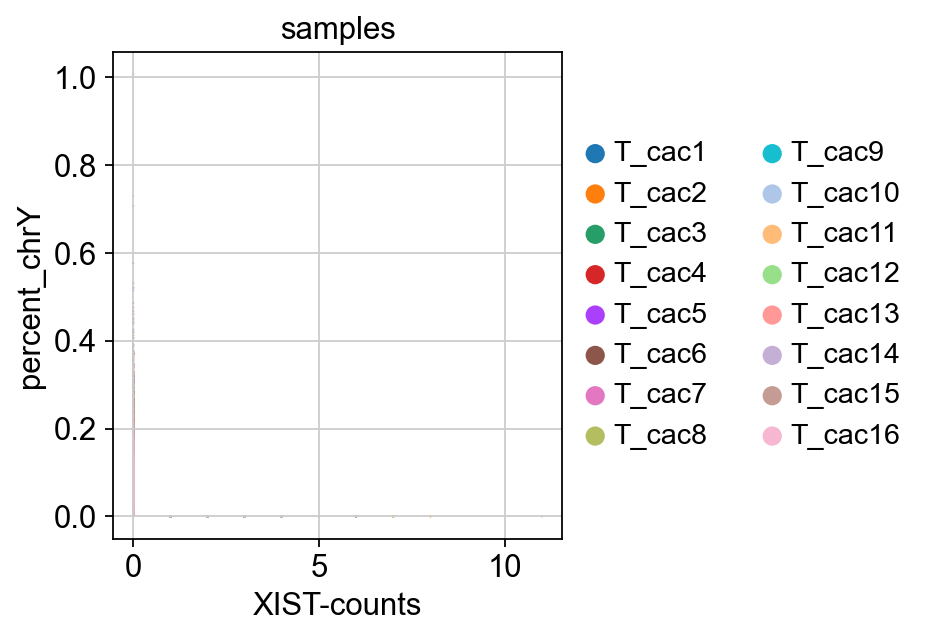

In [37]:
sc.pl.scatter(khaliq_ad_tumor, x = 'XIST-counts', y = 'percent_chrY', color = "samples")

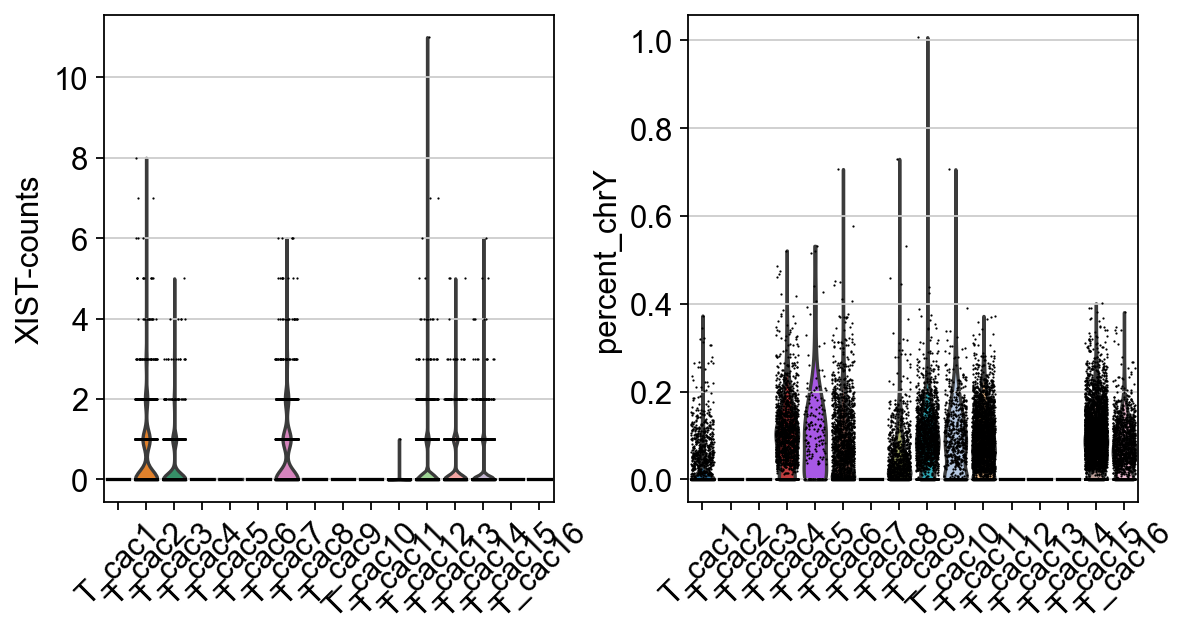

In [39]:
sc.pl.violin(khaliq_ad_tumor, ["XIST-counts", "percent_chrY"], jitter = 0.4, groupby = 'samples', rotation = 45)

## Joanito-2022

#### Uploading data

In [45]:
#Loading again to further processing
input_CRC_file_Joanito = '/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Anna-Master-Project/joanito_2022_anndata_raw.h5ad'  # the file that will store the analysis results
output_CRC_file_Joanito = '/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Anna-Master-Project/joanito_2022_anndata_processed.h5ad'  # the file that will store the analysis results

In [46]:
#Anndata upload
Joanito_ad = sc.read_h5ad(input_CRC_file_Joanito)
Joanito_ad.X

<373058x33287 sparse matrix of type '<class 'numpy.float32'>'
	with 741331835 stored elements in Compressed Sparse Row format>

In [47]:
#Filter out normal (non-tumor samles)
Joanito_ad_tumor = Joanito_ad[Joanito_ad.obs['sample.origin'] == "Tumor", :]

In [48]:
chrY_genes = Joanito_ad_tumor.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['SRY', 'ZFY', 'ZFY-AS1', 'LINC00278', 'TGIF2LY', 'PCDH11Y', 'TSPY2',
       'LINC00280', 'TTTY1B', 'TTTY2B', 'TTTY21B', 'TTTY7', 'TTTY8B', 'AMELY',
       'TBL1Y', 'TTTY12', 'LINC00279', 'TTTY18', 'TTTY19', 'TTTY11', 'TTTY20',
       'TSPY4', 'TSPY8', 'TSPY3', 'FAM197Y5', 'TSPY1', 'TSPY10', 'TTTY8',
       'TTTY7B', 'TTTY21', 'TTTY2', 'TTTY1', 'TTTY22', 'TTTY23', 'USP9Y',
       'DDX3Y', 'UTY', 'TMSB4Y', 'VCY', 'VCY1B', 'NLGN4Y', 'NLGN4Y-AS1',
       'FAM41AY1', 'FAM224B', 'CDY2B', 'CDY2A', 'FAM224A', 'FAM41AY2', 'HSFY1',
       'TTTY9B', 'HSFY2', 'TTTY14', 'KDM5D', 'TTTY10', 'EIF1AY', 'PRORY',
       'RBMY1B', 'RBMY1A1', 'TTTY13', 'RBMY1D', 'RBMY1E', 'PRY2', 'TTTY6B',
       'RBMY1F', 'TTTY5', 'RBMY1J', 'TTTY6', 'PRY', 'TTTY17A', 'TTTY4', 'BPY2',
       'DAZ1', 'DAZ2', 'TTTY3B', 'CDY1B', 'TTTY17B', 'TTTY4B', 'BPY2B', 'DAZ3',
       'DAZ4', 'BPY2C', 'TTTY4C', 'TTTY17C', 'CDY1', 'TTTY3'],
      dtype='object')

In [13]:
type(Joanito_ad_tumor.var_names.str)

pandas.core.strings.accessor.StringMethods

In [49]:
Joanito_ad_tumor.obs["XIST-counts"] = Joanito_ad_tumor.X[:,Joanito_ad_tumor.var_names.str.match('XIST')].toarray().reshape(-1).tolist()

/var/folders/qc/2mwywtjd73z8jw_s09vv_kzm0000gn/T/ipykernel_87942/2828468214.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Joanito_ad_tumor.obs["XIST-counts"] = Joanito_ad_tumor.X[:,Joanito_ad_tumor.var_names.str.match('XIST')].toarray().reshape(-1).tolist()


In [50]:
Joanito_ad_tumor.obs

cell.ID  nFeature_RNA  percent.mt sample.ID  \
0       CRC16_MUX8563_AAACGGGGTCGATTGT-1          5099   17.969349   MUX8563   
1       CRC16_MUX8563_AAAGATGCAGAAGCAC-1          4759   23.734351   MUX8563   
2       CRC16_MUX8563_AAAGCAATCTAACGGT-1          2580   24.403016   MUX8563   
3       CRC16_MUX8563_ACAGCCGGTCTCTTAT-1          2499   11.020450   MUX8563   
4       CRC16_MUX8563_ACAGCTATCCGTCATC-1          4937   23.243570   MUX8563   
...                                  ...           ...         ...       ...   
366889    KUL5_EXT127_TTTCCTCCATTACGAC-1           833    6.911582    EXT127   
366890    KUL5_EXT127_TTTCCTCGTTAAGTAG-1          1617    0.727177    EXT127   
366891    KUL5_EXT127_TTTGCGCGTTCGTGAT-1          1472    4.568457    EXT127   
366892    KUL5_EXT127_TTTGCGCTCATGGTCA-1          2668    1.475736    EXT127   
366893    KUL5_EXT127_TTTGGTTAGACAGACC-1           730    5.807711    EXT127   

       patient.ID sample.origin dataset_x    cell.type    iCMS  msi  ...  \
0         CRC2794         Tumor   CRC-SG1   Epithelial   iCMS2  MSS  ...   
1         CRC2794         Tumor   CRC-SG1   Epithelial   iCMS2  MSS  ...   
2         CRC2794         Tumor   CRC-SG1   Epithelial  Normal  MSS  ...   
3         CRC2794         Tumor   CRC-SG1   Epithelial   iCMS2  MSS  ...   
4         CRC2794         Tumor   CRC-SG1   Epithelial   iCMS2  MSS  ...   
...           ...           ...       ...          ...     ...  ...  ...   
366889      SC044         Tumor      KUL5         T_NK     NaN  NaN  ...   
366890      SC044         Tumor      KUL5      PlasmaB     NaN  NaN  ...   
366891      SC044         Tumor      KUL5         T_NK     NaN  NaN  ...   
366892      SC044         Tumor      KUL5      PlasmaB     NaN  NaN  ...   
366893      SC044         Tumor      KUL5  Neutrophils     NaN  NaN  ...   

       iCMS.inferCNV KRAS  BRAF TP53  APC PIK3CA LymphNode Normal Tumor  \
0              iCMS2   wt    wt  mut  mut     wt       0.0    1.0   4.0   
1              iCMS2   wt    wt  mut  mut     wt       0.0    1.0   4.0   
2              iCMS2   wt    wt  mut  mut     wt       0.0    1.0   4.0   
3              iCMS2   wt    wt  mut  mut     wt       0.0    1.0   4.0   
4              iCMS2   wt    wt  mut  mut     wt       0.0    1.0   4.0   
...              ...  ...   ...  ...  ...    ...       ...    ...   ...   
366889         iCMS3   wt    wt   wt   wt    NaN       0.0    2.0   3.0   
366890         iCMS3   wt    wt   wt   wt    NaN       0.0    2.0   3.0   
366891         iCMS3   wt    wt   wt   wt    NaN       0.0    2.0   3.0   
366892         iCMS3   wt    wt   wt   wt    NaN       0.0    2.0   3.0   
366893         iCMS3   wt    wt   wt   wt    NaN       0.0    2.0   3.0   

       XIST-counts  
0              4.0  
1              0.0  
2              3.0  
3              1.0  
4              1.0  
...            ...  
366889         2.0  
366890        16.0  
366891         4.0  
366892         5.0  
366893         3.0  

[170596 rows x 29 columns]

In [51]:
Joanito_ad_tumor.obs['percent_chrY'] = np.sum(Joanito_ad_tumor[:, chrY_genes].X, axis = 1)/np.sum(Joanito_ad_tumor.X, axis = 1)*100

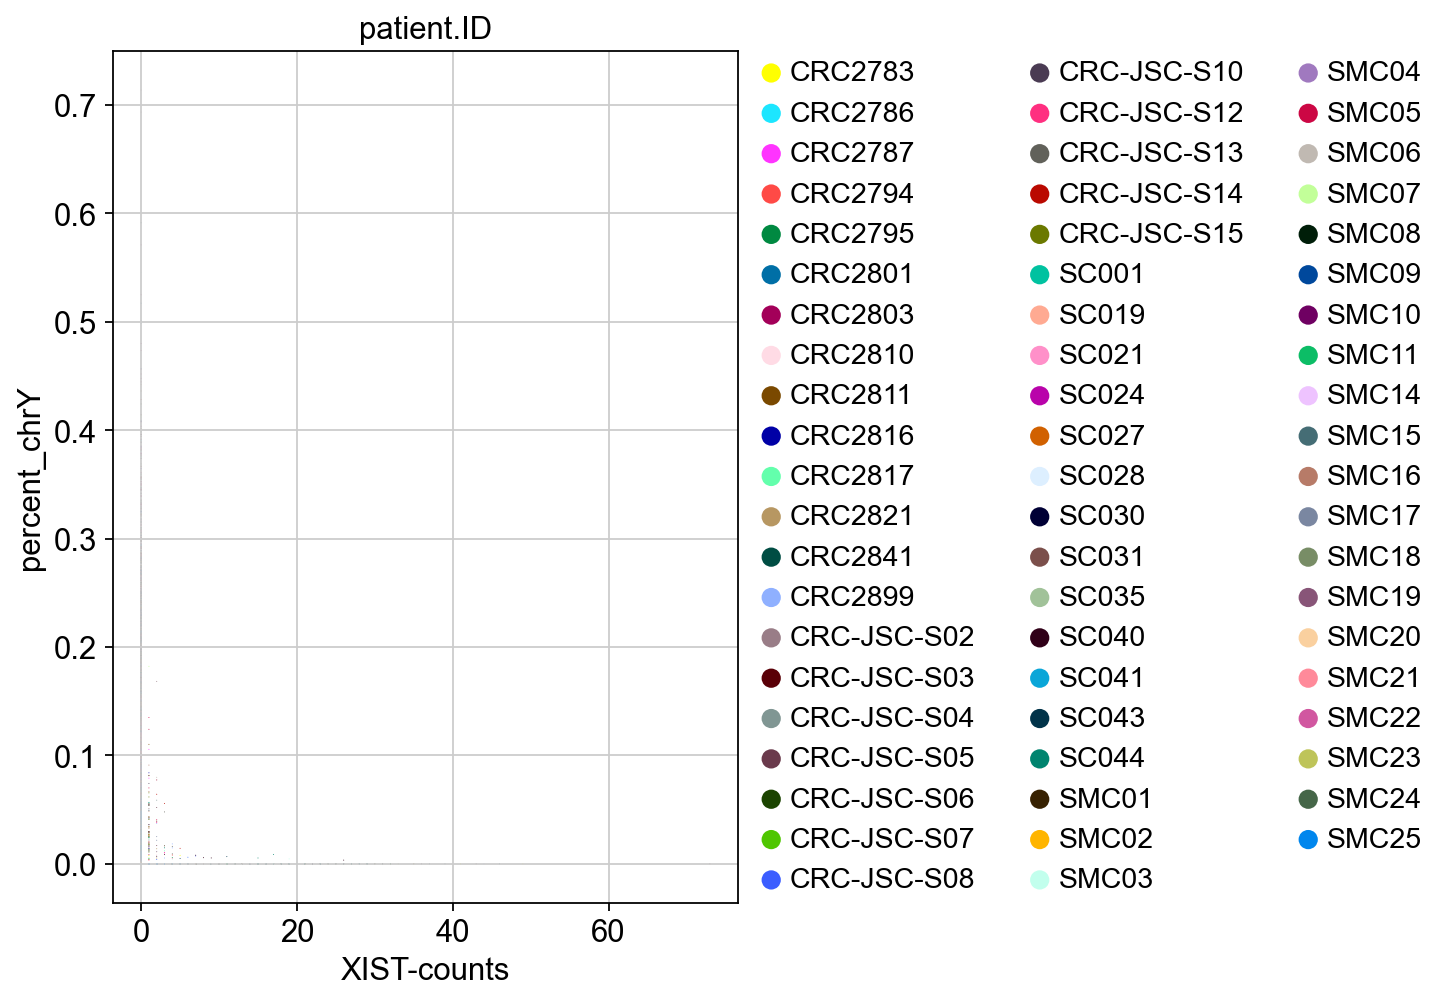

In [57]:
sc.set_figure_params(figsize=(5, 7), dpi=80)
sc.pl.scatter(Joanito_ad_tumor, x = 'XIST-counts', y = 'percent_chrY', color = "patient.ID")

In [59]:
sc.set_figure_params(figsize=(20, 8), dpi=200)
sc.pl.violin(Joanito_ad_tumor, ["XIST-counts", "percent_chrY"], jitter = 0.4, groupby = 'patient.ID', rotation = 45)

## Gut Cell Atlas data

In [14]:
#Loading again to further processing
input_Normal_file = '/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Anna-Master-Project/Full_obj_raw_counts_nosoupx_v2.h5ad'  # the file that will store the analysis results
output_Normal_file = '/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Anna-Master-Project/Full_obj_raw_counts_nosoupx_v2.h5ad'  # the file that will store the analysis results

In [15]:
#Anndata upload
control_ad = sc.read_h5ad(input_Normal_file)
control_ad.X

<428469x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 760344941 stored elements in Compressed Sparse Row format>

In [17]:
#Remove Pediatric Crohn Disease
control_ad_clean = control_ad[~control_ad.obs['Diagnosis'].isin(['Pediatric Crohn Disease']),:]
#Deleting the lymph node samples
control_ad_clean = control_ad_clean[~control_ad_clean.obs['Region'].isin(['lymph node']),:]

In [18]:
chrY_genes = control_ad_clean.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['SRY', 'RPS4Y1', 'ZFY', 'ZFY-AS1', 'LINC00278', 'TGIF2LY', 'PCDH11Y',
       'TSPY2', 'LINC00280', 'TTTY1B', 'TTTY2B', 'TTTY21B', 'TTTY7', 'TTTY8B',
       'AMELY', 'TBL1Y', 'TTTY12', 'LINC00279', 'TTTY18', 'TTTY19', 'TTTY11',
       'TTTY20', 'TSPY4', 'TSPY8', 'TSPY3', 'FAM197Y5', 'TSPY1', 'TSPY10',
       'TTTY8', 'TTTY7B', 'TTTY21', 'TTTY2', 'TTTY1', 'TTTY22', 'TTTY23',
       'USP9Y', 'DDX3Y', 'UTY', 'TMSB4Y', 'VCY', 'VCY1B', 'NLGN4Y',
       'NLGN4Y-AS1', 'FAM41AY1', 'FAM224B', 'CDY2B', 'CDY2A', 'FAM224A',
       'FAM41AY2', 'HSFY1', 'TTTY9B', 'HSFY2', 'TTTY14', 'KDM5D', 'TTTY10',
       'EIF1AY', 'RPS4Y2', 'PRORY', 'RBMY1B', 'RBMY1A1', 'TTTY13', 'RBMY1D',
       'RBMY1E', 'PRY2', 'TTTY6B', 'RBMY1F', 'TTTY5', 'RBMY1J', 'TTTY6', 'PRY',
       'TTTY17A', 'TTTY4', 'BPY2', 'DAZ1', 'DAZ2', 'TTTY3B', 'CDY1B',
       'TTTY17B', 'TTTY4B', 'BPY2B', 'DAZ3', 'DAZ4', 'BPY2C', 'TTTY4C',
       'TTTY17C', 'CDY1', 'TTTY3'],
      dtype='object')

In [33]:
control_ad_clean.obs["XIST-counts"] = control_ad_clean.X[:,control_ad_clean.var_names.str.match('XIST')].toarray().reshape(-1).tolist()

/var/folders/qc/2mwywtjd73z8jw_s09vv_kzm0000gn/T/ipykernel_87942/74369287.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  control_ad_clean.obs["XIST-counts"] = control_ad_clean.X[:,control_ad_clean.var_names.str.match('XIST')].toarray().reshape(-1).tolist()


In [34]:
control_ad_clean.obs['percent_chrY'] = np.sum(control_ad_clean[:, chrY_genes].X, axis = 1)/np.sum(control_ad_clean.X, axis = 1)*100

In [35]:
control_ad_clean.obs

Sample name          Diagnosis    Age  \
AAACCTGAGAACAACT-1-4918STDY7333456        T036  Pediatric healthy      4   
AAACCTGAGCGATATA-1-4918STDY7333456        T036  Pediatric healthy      4   
AAACCTGAGGAGTTTA-1-4918STDY7333456        T036  Pediatric healthy      4   
AAACCTGAGTATCTCG-1-4918STDY7333456        T036  Pediatric healthy      4   
AAACCTGAGTGACTCT-1-4918STDY7333456        T036  Pediatric healthy      4   
...                                        ...                ...    ...   
TTTGGTTTCAACACGT-1-WTDAtest7770719  A30 (398B)      Healthy adult  20-25   
TTTGGTTTCCAAATGC-1-WTDAtest7770719  A30 (398B)      Healthy adult  20-25   
TTTGGTTTCGGCGGTT-1-WTDAtest7770719  A30 (398B)      Healthy adult  20-25   
TTTGTCAGTGAAAGAG-1-WTDAtest7770719  A30 (398B)      Healthy adult  20-25   
TTTGTCATCTTGACGA-1-WTDAtest7770719  A30 (398B)      Healthy adult  20-25   

                                           sample name Region code   Fraction  \
AAACCTGAGAACAACT-1-4918STDY7333456  T036-TIL-SC-EPCAMP         TIL  SC-EPCAMP   
AAACCTGAGCGATATA-1-4918STDY7333456  T036-TIL-SC-EPCAMP         TIL  SC-EPCAMP   
AAACCTGAGGAGTTTA-1-4918STDY7333456  T036-TIL-SC-EPCAMP         TIL  SC-EPCAMP   
AAACCTGAGTATCTCG-1-4918STDY7333456  T036-TIL-SC-EPCAMP         TIL  SC-EPCAMP   
AAACCTGAGTGACTCT-1-4918STDY7333456  T036-TIL-SC-EPCAMP         TIL  SC-EPCAMP   
...                                                ...         ...        ...   
TTTGGTTTCAACACGT-1-WTDAtest7770719  A30-SCL-6-SC-45N-2         SCL     SC-45N   
TTTGGTTTCCAAATGC-1-WTDAtest7770719  A30-SCL-6-SC-45N-2         SCL     SC-45N   
TTTGGTTTCGGCGGTT-1-WTDAtest7770719  A30-SCL-6-SC-45N-2         SCL     SC-45N   
TTTGTCAGTGAAAGAG-1-WTDAtest7770719  A30-SCL-6-SC-45N-2         SCL     SC-45N   
TTTGTCATCTTGACGA-1-WTDAtest7770719  A30-SCL-6-SC-45N-2         SCL     SC-45N   

                                   Gender    Region 10X            batch  ...  \
AAACCTGAGAACAACT-1-4918STDY7333456      M  SmallInt  3'  4918STDY7333456  ...   
AAACCTGAGCGATATA-1-4918STDY7333456      M  SmallInt  3'  4918STDY7333456  ...   
AAACCTGAGGAGTTTA-1-4918STDY7333456      M  SmallInt  3'  4918STDY7333456  ...   
AAACCTGAGTATCTCG-1-4918STDY7333456      M  SmallInt  3'  4918STDY7333456  ...   
AAACCTGAGTGACTCT-1-4918STDY7333456      M  SmallInt  3'  4918STDY7333456  ...   
...                                   ...       ...  ..              ...  ...   
TTTGGTTTCAACACGT-1-WTDAtest7770719      F  LargeInt  3'  WTDAtest7770719  ...   
TTTGGTTTCCAAATGC-1-WTDAtest7770719      F  LargeInt  3'  WTDAtest7770719  ...   
TTTGGTTTCGGCGGTT-1-WTDAtest7770719      F  LargeInt  3'  WTDAtest7770719  ...   
TTTGTCAGTGAAAGAG-1-WTDAtest7770719      F  LargeInt  3'  WTDAtest7770719  ...   
TTTGTCATCTTGACGA-1-WTDAtest7770719      F  LargeInt  3'  WTDAtest7770719  ...   

                                    total_counts  total_counts_mt  \
AAACCTGAGAACAACT-1-4918STDY7333456   1912.793579        46.228199   
AAACCTGAGCGATATA-1-4918STDY7333456   2152.089355         0.122579   
AAACCTGAGGAGTTTA-1-4918STDY7333456   1686.883423        80.195816   
AAACCTGAGTATCTCG-1-4918STDY7333456   2135.183838       104.506760   
AAACCTGAGTGACTCT-1-4918STDY7333456   3103.050293        95.846077   
...                                          ...              ...   
TTTGGTTTCAACACGT-1-WTDAtest7770719   4838.415039       144.966095   
TTTGGTTTCCAAATGC-1-WTDAtest7770719   5337.013672        85.408028   
TTTGGTTTCGGCGGTT-1-WTDAtest7770719  48142.085938      7198.451172   
TTTGTCAGTGAAAGAG-1-WTDAtest7770719  10848.547852       600.362671   
TTTGTCATCTTGACGA-1-WTDAtest7770719   5108.408203       188.304367   

                                    pct_counts_mt  doublet_scores  \
AAACCTGAGAACAACT-1-4918STDY7333456       2.416790        0.016442   
AAACCTGAGCGATATA-1-4918STDY7333456       0.005696        0.027389   
AAACCTGAGGAGTTTA-1-4918STDY7333456       4.754082        0.014817   
AAACCTGAGTATCTCG-1-4918STDY7333456       4.894509        0.039416   
AA

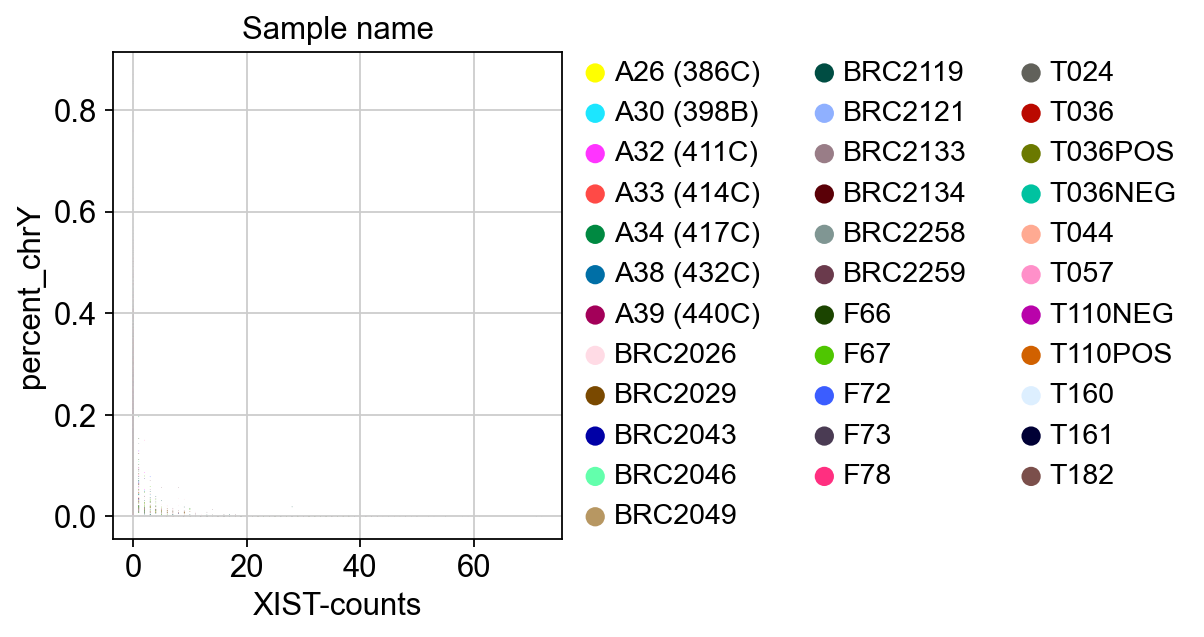

In [36]:
sc.pl.scatter(control_ad_clean, x = 'XIST-counts', y = 'percent_chrY', color = "Sample name")

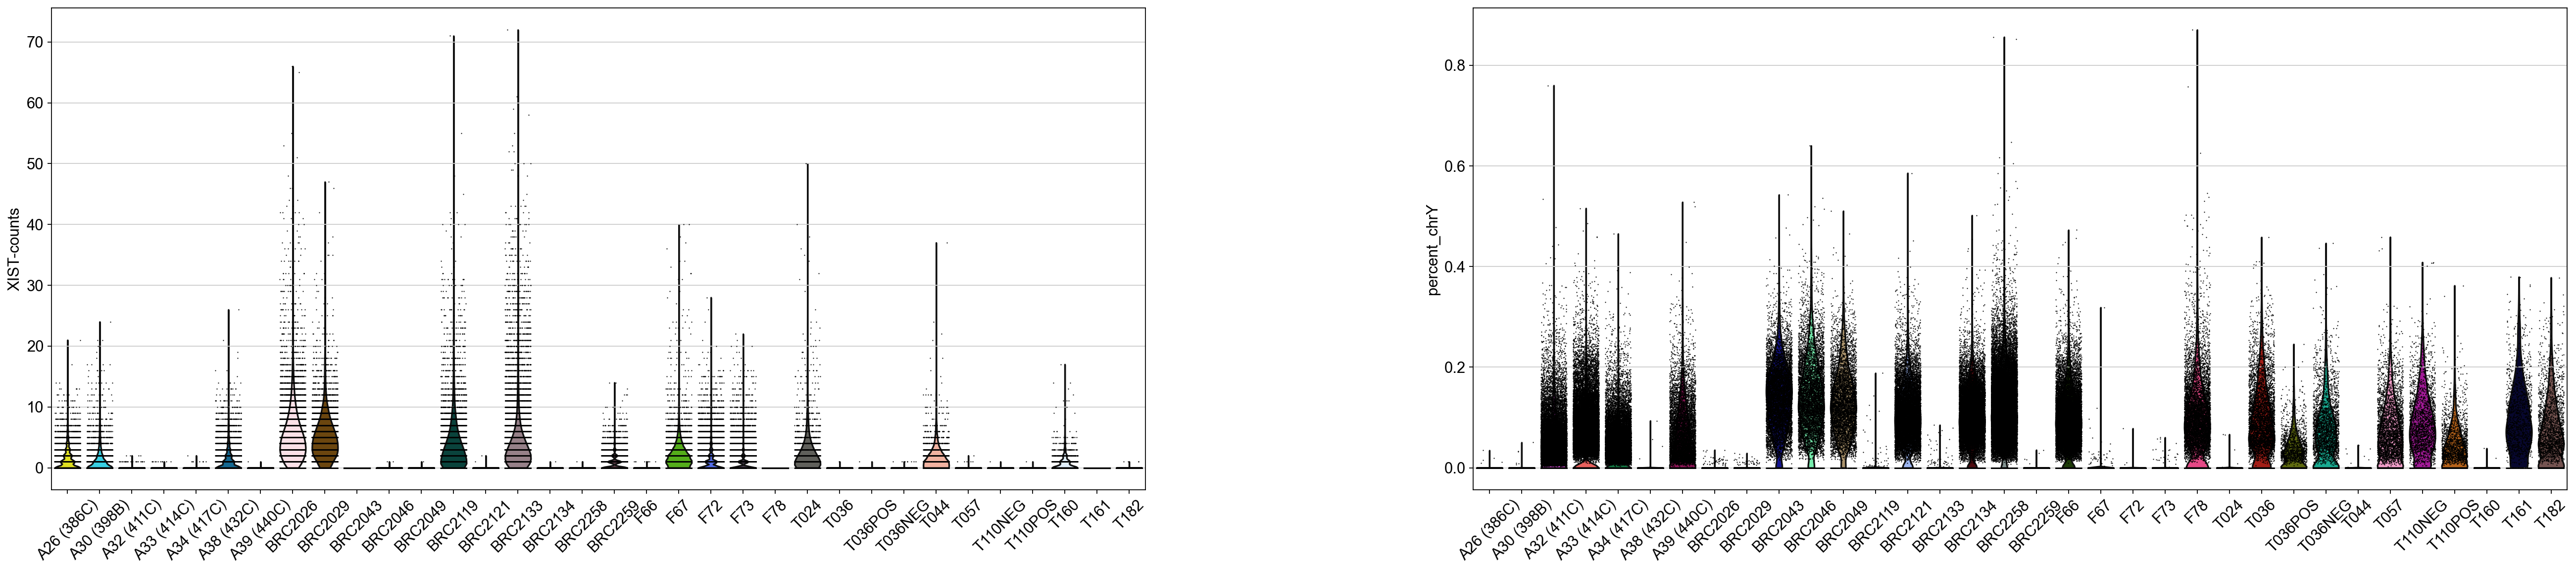

In [44]:
sc.set_figure_params(figsize=(14, 8), dpi=80)
sc.pl.violin(control_ad_clean, ["XIST-counts", "percent_chrY"], jitter = 0.4, groupby = 'Sample name', rotation = 45)